# 퍼셉트론

퍼셉트론이 신경망(딥러닝)의 기원이 되는 알고리즘이다.

## 퍼셉트론이란?
페셉트론(Percetron)은 다수의 신호를 입력으로 받아 하나의 신호를 출력한다.
입력 신호에는 각각 고유한 가중치가 곱해지고, 이들의 가중치의 합이 정해진 한계를 넘을 때만 1을 출력한다. 이를 '뉴런'이라고 부르며, 이는 신경세포와 유사하다.

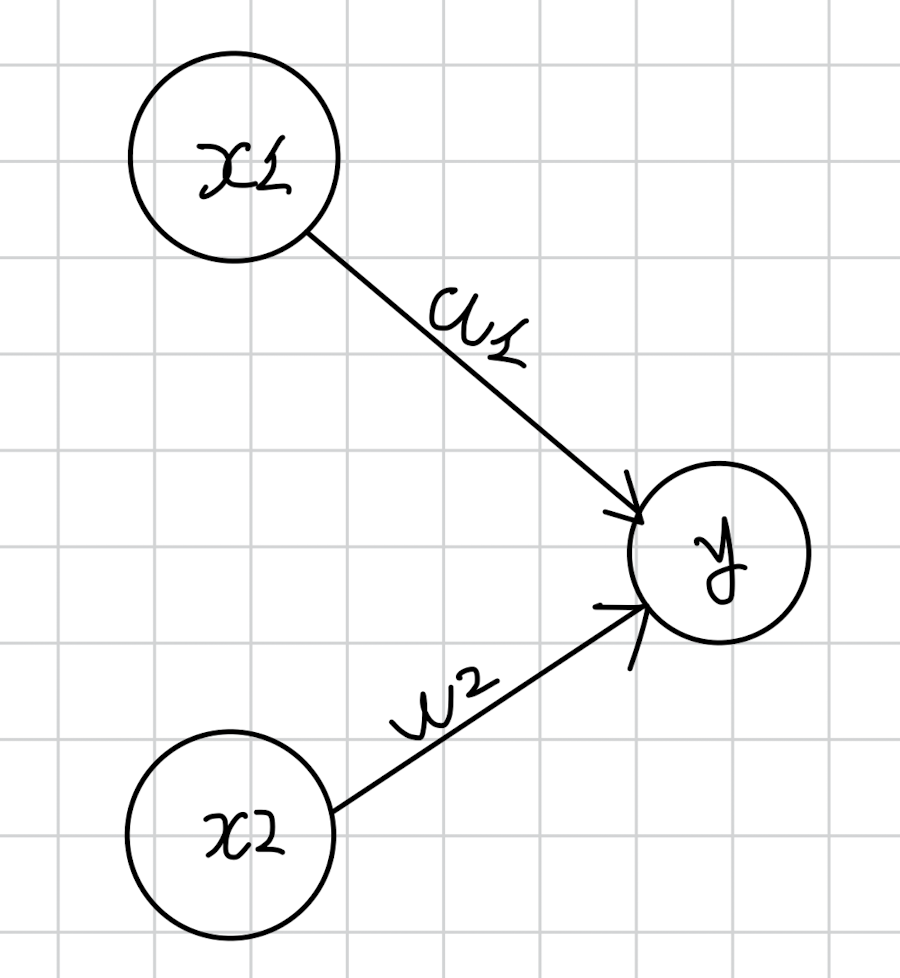

x1, x2는 입력신호, y는 출력신호, w1, w2는 가중치를 뜻한다.

그림의 원을 뉴런(노드)라고 부른다

입력 신호가 뉴런에 보내질 대는 각각 고유의 *가중치*가 곱해진다. 뉴런에서 보내운 신호의 총합이 정해진 한계를 넘어설 때 1을 출력한다. 

이를 '뉴런을 활성화한다'라고 표현하고, 이 한계를 *임계값*($\theta$)이라고 부른다.

$$
y = \begin{cases} 0 & (w_1x_1 + w_2x_2 \le \theta) \\ 1 & (w_1x_1 + w_2x_2 > \theta) \end{cases}
$$

퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여한다. 이때, 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용한다. 즉, 가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻한다.

## 2.2. 단순한 논리 회로

### 2.2.1. AND 게이트
AND 게이트는 두 입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력한다.

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 0 |
| 1  | 0  | 0 |
| 0  | 1  | 0 |
| 1  | 1  | 1 |

이 AND 게이트를 퍼셉트론으로 표현하면 w1, w2, $\theta$의 값을 논리표대로 작동하도록 설정하면 된다.

이를 만족 시키는 매개변수 조합은 무한히 많다. 예를 들어, (w1, w2, $\theta$) = (0.5, 0.5, 0.7)이나 (1.0, 1.0, 1.0) 등이 있다.

### 2.2.2. NAND 게이트와 OR 게이트

NAND 게이트는 Not AND를 의미하며, AND 게이트의 출력을 뒤집은 것이다. 즉, 두 입력이 모두 1일 때만 0을 출력하고, 그 외에는 1을 출력한다.

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

NAND 게이트를 퍼셉트론으로 표현하면 AND 게이트의 매개변수의 부호를 모두 반전하면 된다.

OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로이다.

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 0 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 1 |

OR 게이트를 퍼셉트론으로 표현하면 AND 게이트의 매개변수의 부호를 모두 양수로 하면 된다.

## 2.3. 퍼셉트론 구현하기

### 2.3.1. AND 게이트 구현하기

다음 식을 파이썬으로 구현하면 된다.
$$
AND(x_1, x_2) = \begin{cases} 0 & (0.5x_1 + 0.5x_2 \le 0.7) \\ 1 & (0.5x_1 + 0.5x_2 > 0.7) \end{cases}
$$

AND에 0, 0을 입력했을 때: $0.5 \times 0 + 0.5 \times 0 = 0 \le 0.7$

AND에 1, 0을 입력했을 때: $0.5 \times 1 + 0.5 \times 0 = 0.5 \le 0.7$

AND에 0, 1을 입력했을 때: $0.5 \times 0 + 0.5 \times 1 = 0.5 \le 0.7$

AND에 1, 1을 입력했을때: $0.5 \times 1 + 0.5 \times 1 = 1 > 0.7$

In [6]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1
  
print(f"AND(0, 0) = {AND(0, 0)}")
print(f"AND(1, 0) = {AND(1, 0)}")
print(f"AND(0, 1) = {AND(0, 1)}")
print(f"AND(1, 1) = {AND(1, 1)}")

AND(0, 0) = 0
AND(1, 0) = 0
AND(0, 1) = 0
AND(1, 1) = 1


### 2.3.2. 가중치와 편향 도입

편향을 도입하면 식이 다음과 같이 변한다.
$$
y = \begin{cases} 0 & (b + w_1x_1 + w_2x_2 \le 0) \\ 1 & (b + w_1x_1 + w_2x_2 > 0) \end{cases}
$$

b를 편향(bias)이라고 하며, 뉴런이 얼마나 쉽게 활성화되는지를 제어한다.

퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다.

### 2.3.3. 가중치와 편향 구현하기

가중치와 편향을 도입한 AND 게이트는 다음과 같이 구현할 수 있다.

In [7]:
import numpy as np
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  print(f"AND tmp: {tmp}")
  if tmp <= 0:
    return 0
  else:
    return 1

print(f"AND(0, 0) = {AND(0, 0)}")
print(f"AND(1, 0) = {AND(1, 0)}")
print(f"AND(0, 1) = {AND(0, 1)}")
print(f"AND(1, 1) = {AND(1, 1)}")

AND tmp: -0.7
AND(0, 0) = 0
AND tmp: -0.19999999999999996
AND(1, 0) = 0
AND tmp: -0.19999999999999996
AND(0, 1) = 0
AND tmp: 0.30000000000000004
AND(1, 1) = 1


$\theta$가 편향(bias)로 치환되었고, $w_1, w_2$는 가중치로 치환되었다.

가중치는 입력 신호가 결과에 주는 *영향력*을 조절하는 매개변수이고, 편향은 뉴런이 얼마나 쉽게 *활성화*되는지를 조정하는 매개변수이다.

In [8]:
# NAND
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5]) # ANDの重みとバイアスだけが異なる
  b = 0.7 # ANDのバイアスと異なる
  tmp = np.sum(w*x) + b
  print(f"NAND tmp: {tmp}")
  if tmp <= 0:
    return 0
  else:
    return 1

print(f"NAND(0, 0) = {NAND(0, 0)}")
print(f"NAND(1, 0) = {NAND(1, 0)}")
print(f"NAND(0, 1) = {NAND(0, 1)}")
print(f"NAND(1, 1) = {NAND(1, 1)}")

NAND tmp: 0.7
NAND(0, 0) = 1
NAND tmp: 0.19999999999999996
NAND(1, 0) = 1
NAND tmp: 0.19999999999999996
NAND(0, 1) = 1
NAND tmp: -0.30000000000000004
NAND(1, 1) = 0


In [9]:
# OR
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5]) # ANDの重みとバイアスだけが異なる
  b = -0.2 # ANDのバイアスと異なる
  tmp = np.sum(w*x) + b
  print(f"OR tmp: {tmp}")
  if tmp <= 0:
    return 0
  else:
    return 1

print(f"OR(0, 0) = {OR(0, 0)}")
print(f"OR(1, 0) = {OR(1, 0)}")
print(f"OR(0, 1) = {OR(0, 1)}")
print(f"OR(1, 1) = {OR(1, 1)}")


OR tmp: -0.2
OR(0, 0) = 0
OR tmp: 0.3
OR(1, 0) = 1
OR tmp: 0.3
OR(0, 1) = 1
OR tmp: 0.8
OR(1, 1) = 1


## 2.4. 퍼셉트론의 한계

### 2.4.1. XOR 게이트

XOR 게이트는 배타적 논리합이라는 논리 회로이다. x1과 x2 중 한쪽이 1일 때만 1을 출력한다.

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 0 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다. 즉, 직선 하나로 영역을 나누는 것은 불가능하다.

* OR 게이트의 동작은 가중치가 (b, w1, w2) = (-0.5, 1.0, 1.0)인 직선으로 영역을 나누는 것이 가능하다.
* AND 게이트의 동작은 가중치가 (b, w1, w2) = (-0.7, 0.5, 0.5)인 직선으로 영역을 나누는 것이 가능하다.
* NAND 게이트의 동작은 가중치가 (b, w1, w2) = (0.7, -0.5, -0.5)인 직선으로 영역을 나누는 것이 가능하다.
* XOR 게이트의 동작은 직선 하나로 영역을 나누는 것이 불가능하다. (선을 두개 그으면 안되나?ㅋ)

### 2.4.2. 선형과 비선형

* 직선 하나로 영역을 나누는 것을 *선형*이라고 하고, 그렇지 않은 것을 *비선형*이라고 한다.
* 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다. 즉, 비선형 영역은 표현할 수 없다.

## 2.5. 다층 퍼셉트론이 출동한다면

퍼셉트론을 여러 개 쌓아올리면 `다층 퍼셉트론`이 된다. 즉, 층을 쌓아올린 퍼셉트론이다. 이 다층 퍼셉트론은 XOR 게이트를 표현할 수 있다.

### 2.5.1. 기존 게이트 조합하기

```mermaid
graph LR
  x1((x1))
  x2((x2))
  nand(NAND)
  or(OR)
  and(AND)

  x1 --> nand
  x2 --> nand

  x1 --> or
  x2 --> or

  nand -->|s1| and
  or -->|s2| and

  and --> y((y))
```

*XOR 게이트 진리표*
| x1 | x2 | s1 | s2 | y |
|----|----|----|----|---|
| 0  | 0  | 1  | 0  | 0 |
| 1  | 0  | 1  | 1  | 1 |
| 0  | 1  | 1  | 1  | 1 |
| 1  | 1  | 0  | 1  | 0 |
  

In [11]:
# XOR
def XOR(x1, x2):
  print(f"XOR({x1}, {x2})")
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

print(f"XOR(0, 0) = {XOR(0, 0)}")
print(f"XOR(1, 0) = {XOR(1, 0)}")
print(f"XOR(0, 1) = {XOR(0, 1)}")
print(f"XOR(1, 1) = {XOR(1, 1)}")

XOR(0, 0)
NAND tmp: 0.7
OR tmp: -0.2
AND tmp: -0.19999999999999996
XOR(0, 0) = 0
XOR(1, 0)
NAND tmp: 0.19999999999999996
OR tmp: 0.3
AND tmp: 0.30000000000000004
XOR(1, 0) = 1
XOR(0, 1)
NAND tmp: 0.19999999999999996
OR tmp: 0.3
AND tmp: 0.30000000000000004
XOR(0, 1) = 1
XOR(1, 1)
NAND tmp: -0.30000000000000004
OR tmp: 0.8
AND tmp: -0.19999999999999996
XOR(1, 1) = 0
